## Дополнение к VISUAL по библиотекам

1.Импортируем все, что надо, настраиваем экран, размер, цветовую схему  
2.df = pd.read_csv("VGSales.csv").dropna() Загружаем DF, сразу удаляем все строки хотябы с одним NaN  
3.Преобразуем  
### DF.plot()
Основной простой быстрый инструмент
4.df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']].groupby('Year_of_Release').sum().plot();  
Посмотрим продажи по годам выхода  
df[[x for x in df.columns if "Sales" in x]+["Year_of_Release"]].groupby("Year_of_Release").sum().plot(kind = 'bar', rot = 45);  Тоже самое, но указаны вид графика и повернуты надписи по оси икс  
### SEABORN
Высокоуровневая библиотека с хорошими предустановками для сложных графиков  
#### sns.pairplot()
Посмотрим матрицу рассеивания по паре значений  
sns.pairplot(df[["Global_Sales", "Critic_Score", "Critic_Count", "User_Score", "User_Count"]]);  
#### sns.distplot()
График распределения с плотностью ядра  
sns.distplot(df['Critic_Score']);
#### sns.jointplot()
Диаграмма рассеивания с графиками распределения  
sns.jointplot(x = 'Critic_Score', y = 'User_Score', data = df, kind = 'scatter');  
#### sns.boxplot()
Боксплоты  
top = (df['Platform'].value_counts().sort_values(ascending = False).head().index.values)  
sns.boxplot(x = 'Critic_Score', y = 'Platform', data = df[df['Platform'].isin(top)], orient = 'h');  
#### sns.heatmap()
Тепловая карта позволяет посмотреть зависимость колич переменной от двух категориальных  
platform_genre_sales = (df.pivot_table(index="Platform", columns="Genre", values="Global_Sales",   aggfunc=sum).fillna(0).applymap(float))     
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=0.5);  
### Plotly
Позволяет работать курсором на графике, передвигая значения и т.д.  








In [1]:
#Основа визуализаций в Питоне
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

#СВГ формат лучший для отображения графиков
%config InlineBackend.figur_format = 'svg'

#Установим основной размер и цветовую схему
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["image.cmap"] = 'viridis'

import pandas as pd

In [2]:
df = pd.read_csv("VGSales.csv").dropna()
print(df.shape)

(6825, 16)


In [3]:
df.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E


In [4]:
df.info()
#В некоторых колонках плохие форматы, например - год выхода - флоат, а надо инт и др.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [5]:
#Преобразуем форматы в правильные, подсчеты и год выхода - инты, очки пользователя - флоат
df["User_Score"] = df["User_Score"].astype('float64')
df["Year_of_Release"] = df["Year_of_Release"].astype('int64')
df["User_Count"] = df["User_Count"].astype('int64')
df["Critic_Count"] = df["Critic_Count"].astype('int64')

In [6]:
df.head(2)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51,8.0,322,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73,8.3,709,Nintendo,E


## DF.plot()

Огромное количество различных настроек!!!

In [7]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

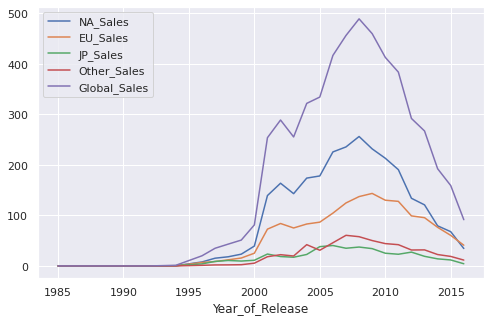

In [8]:
df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']].groupby('Year_of_Release').sum().plot();

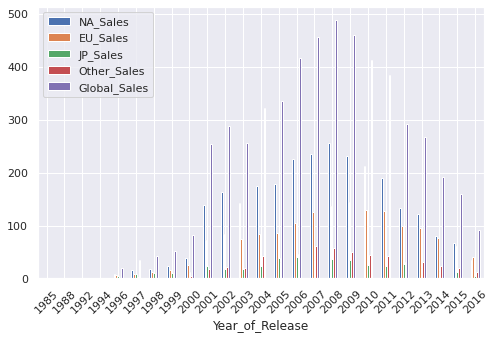

In [9]:
#kind - вид графика, rot - наклон надписей по оси икс(градусы)
df[[x for x in df.columns if "Sales" in x]+["Year_of_Release"]].groupby("Year_of_Release").sum().plot(kind = 'bar', rot = 45);

## SEABORN
Высокоуровневая библиотека с предустановленными настройками, удобна для сложных графиков

In [10]:
#Для маленьких графиков лучше png
%config InlineBackend.figur_format = 'png'

## sns.pairplot()
Матрица рассеивания по паре признаков, все со всеми

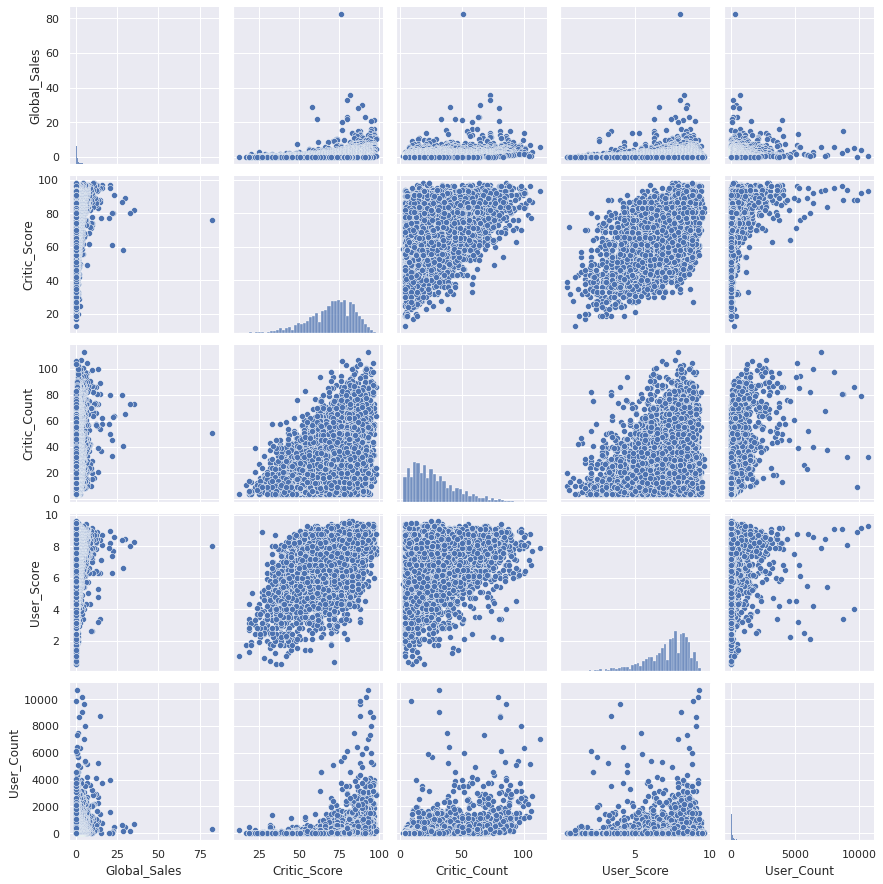

In [9]:
sns.pairplot(df[["Global_Sales", "Critic_Score", "Critic_Count", "User_Score", "User_Count"]]);

## sns.distplot()


In [12]:
%config InlineBackend.figur_format = 'svg'

/home/anton/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


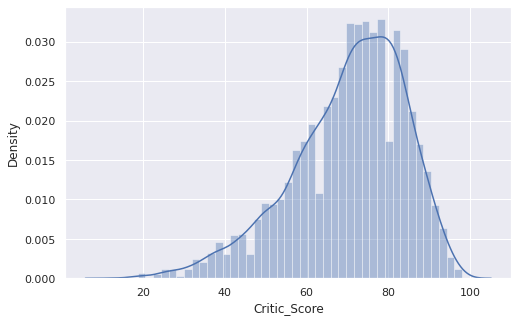

In [13]:
sns.distplot(df['Critic_Score']);

## sns.jointplot()

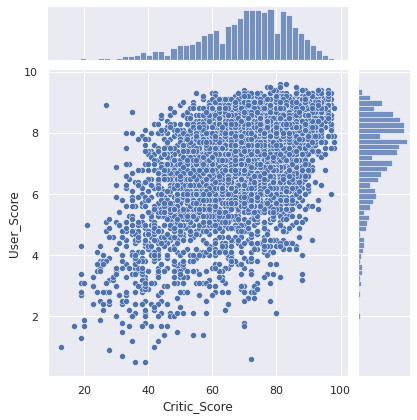

In [14]:
sns.jointplot(x = 'Critic_Score', y = 'User_Score', data = df, kind = 'scatter');

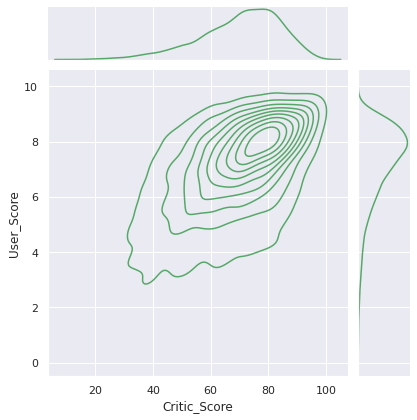

In [15]:
sns.jointplot(x = 'Critic_Score', y = 'User_Score', data = df, kind = 'kde', color = 'g');

## sns.boxplot()

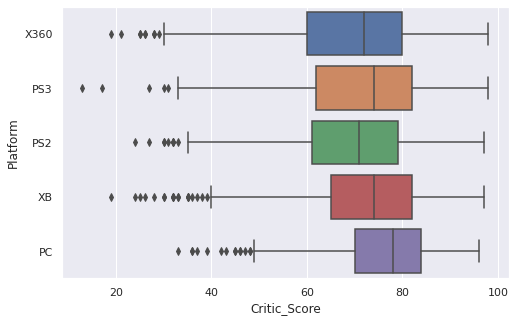

In [16]:
top = (df['Platform'].value_counts().sort_values(ascending = False).head().index.values)
sns.boxplot(x = 'Critic_Score', y = 'Platform', data = df[df['Platform'].isin(top)], orient = 'h');

## sns.heatmap()
Тепловая карта позволяет посмотреть зависимость колич переменной от двух категориальных

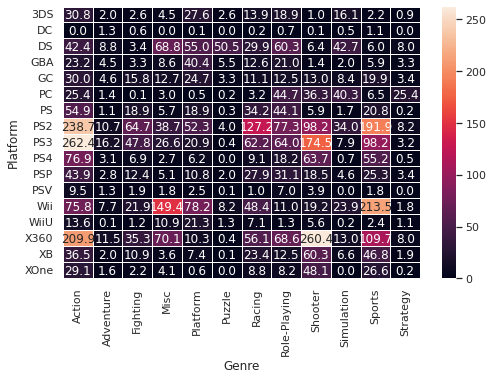

In [17]:
platform_genre_sales = (df.pivot_table(index="Platform", columns="Genre", values="Global_Sales", aggfunc=sum).fillna(0).applymap(float))   
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=0.5);

## Plotly
Позволяет работать курсором на графике, передвигая значения и т.д. 
Интерактивные графики!

In [1]:
import plotly

In [2]:
import plotly
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

init_notebook_mode(connected = True)

In [31]:
#Будем смотреть продажи по годам, группируем, считаем сумму
df.groupby(['Year_of_Release'])['Global_Sales'].sum().head(2)

Year_of_Release
1985    0.03
1988    0.03
Name: Global_Sales, dtype: float64

In [40]:
#Не разобрался что такое нэйм в дф
df.groupby(['Year_of_Release'])['Name'].count().head(2)

Year_of_Release
1985    1
1988    1
Name: Name, dtype: int64

In [73]:
#JOINим две таблички(вторые скобки для того, чтобы сделать из Series список, с типом Сериес не выдет)
df2 = df.groupby(['Year_of_Release'])[['Name']].count()\
.join(df.groupby(['Year_of_Release'])[['Global_Sales']].sum())

In [74]:
df2.head(2)

,Name,Global_Sales
Year_of_Release,,
1985,1,0.03
1988,1,0.03


In [75]:
#Переименуем для отображения на графике
df2.columns = ['Number_of_Games', 'Global_Sales']

In [76]:
df2.head(2)

,Number_of_Games,Global_Sales
Year_of_Release,,
1985,1,0.03
1988,1,0.03


plotly.graph_objects.Figure (здесь и обычно go.Figure) - основной инструмент!  
Массивы строк здесь traces, и др. настройки.  
Надо обязательно отключать show_link = False чтобы не отправлять графики на plot.ly и не нажимать случайно ссылки

In [82]:
#Создадим сначала массивы traces:
trace_0 = go.Scatter(x = df2.index, y = df2['Global_Sales'], name = 'Объем продаж')
trace_1 = go.Scatter(x = df2.index, y = df2['Number_of_Games'], name = 'Number_of_Games_Released')

In [83]:
#А теперь и массив
data = [trace_0, trace_1]

In [84]:
#Название для всего графика
layout = {'title': 'Статистика по видеоиграм'}

In [85]:
fig = go.Figure(data = data, layout = layout)
iplot(fig, show_link = False);

### Гистограмма в plotly

Сравним долю рынка различных платформ с разбивкой по общей выручке и новым релизам

In [86]:
df.head(2)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51,8.0,322,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73,8.3,709,Nintendo,E


In [87]:
df.groupby(['Platform'])['Global_Sales'].sum().head(2)

Platform
3DS    123.23
DC       4.55
Name: Global_Sales, dtype: float64

In [88]:
df.groupby(['Platform'])['Name'].count().head(2)

Platform
3DS    155
DC      14
Name: Name, dtype: int64

In [107]:
df3 = df.groupby(['Platform'])[['Name']].count().join(df.groupby(['Platform'])[['Global_Sales']].sum())

In [100]:
df3.columns = ['Number', 'Общие продажи']

In [108]:
df3

,Name,Global_Sales
Platform,,
3DS,155,123.23
DC,14,4.55
DS,464,382.33
GBA,237,131.75
GC,348,159.42
PC,651,187.12
PS,150,206.55
PS2,1140,945.97
PS3,769,784.30


In [110]:
trace0 = go.Bar(x = df3.index, y = df3['Global_Sales'], name = 'Общие продажи')

In [111]:
trace1 = go.Bar(x = df3.index, y = df3['Name'], name = 'Numder of Games Realised')

In [112]:
data = [trace0, trace1]
layout = {'title': 'Выручка по релизу и по платформе'}

In [114]:
#Гистограмма несортированная
fig = go.Figure(data = data, layout = layout)
iplot(fig, show_link = False);

In [119]:
#Сортируем по убыванию, меняем ДФ
df3.sort_values('Global_Sales', ascending=False, inplace=True)

In [120]:
trace0 = go.Bar(x = df3.index, y = df3['Global_Sales'], name = 'Общие продажи')
trace1 = go.Bar(x = df3.index, y = df3['Name'], name = 'Numder of Games Realised')
data = [trace0, trace1]
layout = {'title': 'Выручка по релизу и по платформе. По убыванию'}
fig = go.Figure(data = data, layout = layout)
iplot(fig, show_link = False);

## Боксплот в Plotly

Посмотрим распределение оценок критиков по жанрам игры

In [125]:
df.head(2)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51,8.0,322,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73,8.3,709,Nintendo,E


In [126]:
df.groupby(['Genre']).Critic_Score.describe().head(2)

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,1630.0,67.828834,14.279058,19.0,59.0,70.0,78.00,98.0
Adventure,248.0,66.133065,14.457618,17.0,58.0,67.5,77.25,93.0


In [ ]:
data = []

for _ in 